In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chisquare
%matplotlib inline

data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv") 

In [2]:
data2 = data[data.Year_of_Release >= 2007][['Genre', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
data2 = data2.dropna()

In [3]:
data2['NA_Sales'] = data2['NA_Sales'] * 10
data2['EU_Sales'] = data2['EU_Sales'] * 10
data2['JP_Sales'] = data2['JP_Sales'] * 10
data2['Other_Sales'] = data2['Other_Sales'] * 10
data2['Global_Sales'] = data2['Global_Sales'] * 10

In [15]:
data2.groupby('Genre').sum().to_pickle('DF_genresum')
data2.groupby('Genre').sum()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,4921.7,3356.7,963.0,1264.6,10511.4
Adventure,564.1,353.2,269.1,113.5,1300.8
Fighting,818.7,381.5,257.9,201.9,1659.3
Misc,2591.6,1276.2,487.9,523.2,4880.5
Platform,1111.4,698.2,259.9,235.0,2305.2
Puzzle,381.2,256.9,90.3,63.4,794.1
Racing,1126.8,1046.3,123.3,355.5,2652.9
Role-Playing,1754.1,1026.7,1506.0,364.0,4649.2
Shooter,3501.1,2301.6,174.6,810.7,6790.6


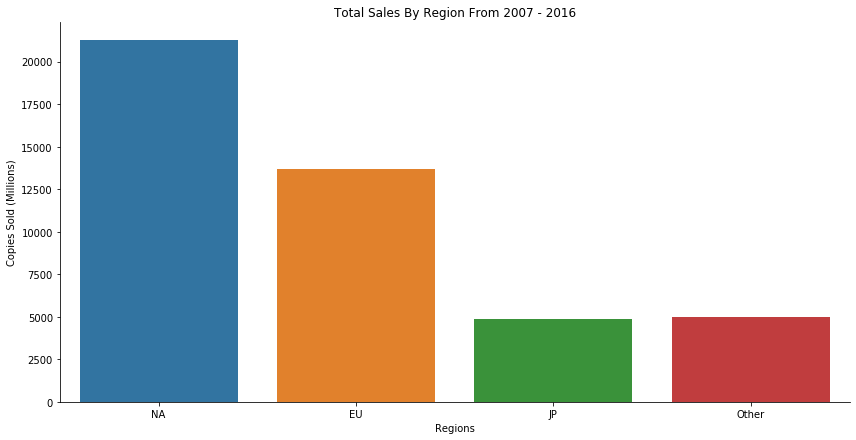

In [10]:
g = sns.catplot(x=['NA', 'EU', 'JP', 'Other'], y=[data2['NA_Sales'].sum(), data2['EU_Sales'].sum(), data2['JP_Sales'].sum(), data2['Other_Sales'].sum()],data = data2,height=6,kind='bar', aspect = 2)
plt.xlabel('Regions')
plt.ylabel('Copies Sold (Millions)')
plt.title('Total Sales By Region From 2007 - 2016')
plt.show()

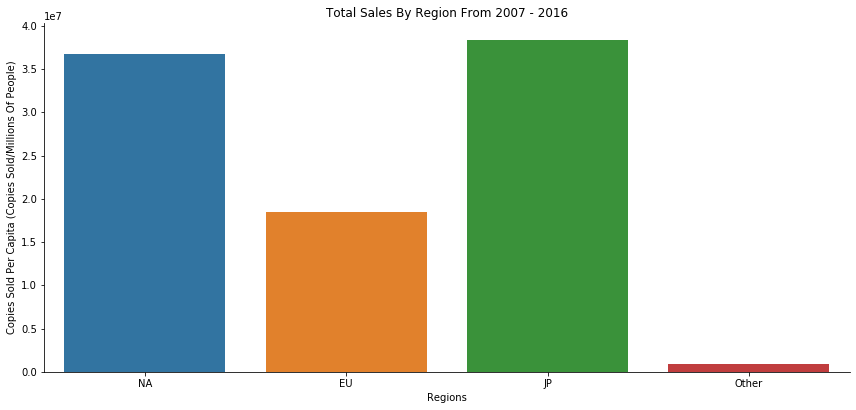

In [12]:
naW = data2['NA_Sales'].sum() / 579 * 1000000
euW = data2['EU_Sales'].sum() / 741 * 1000000
jpW = data2['JP_Sales'].sum() / 127 * 1000000
otherW = data2['Other_Sales'].sum() / 5553 * 1000000

g = sns.catplot(x=['NA', 'EU', 'JP', 'Other'], y=[naW, euW, jpW, otherW],data = data2,height=6,kind='bar', aspect = 2)
plt.xlabel('Regions')
plt.ylabel('Copies Sold Per Capita (Copies Sold/Millions Of People)')
plt.title('Total Sales By Region From 2007 - 2016')
plt.show()

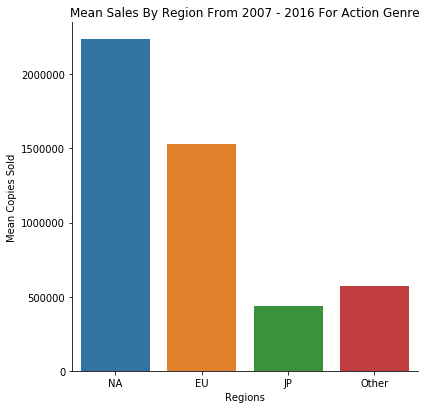

In [68]:
#Action T-Tests for Each Region compared to NA, as well as JP compared to Other showing that they are significantly different
Act_DF = data2[data2['Genre'] == 'Action']
Act_DF_NA = data2[data2['Genre'] == 'Action']['NA_Sales']
Act_DF_EU = data2[data2['Genre'] == 'Action']['EU_Sales']
Act_DF_JP = data2[data2['Genre'] == 'Action']['JP_Sales']
Act_DF_O = data2[data2['Genre'] == 'Action']['Other_Sales']

g = sns.catplot(x=['NA','EU','JP','Other'], y=[Act_DF_NA.mean()*1000000, Act_DF_EU.mean()*1000000,Act_DF_JP.mean()*1000000,Act_DF_O.mean()*1000000],data = data2,height=6,kind='bar', aspect = 1)
plt.xlabel('Regions')
plt.ylabel('Mean Copies Sold')
plt.title('Mean Sales By Region From 2007 - 2016 For Action Genre')
plt.savefig('act_graph.png')

plt.show()

In [26]:
stats.ttest_ind(Act_DF_NA,Act_DF_EU)

Ttest_indResult(statistic=5.059698107214779, pvalue=4.370528156013464e-07)

In [25]:
stats.ttest_ind(Act_DF_NA,Act_DF_JP)

Ttest_indResult(statistic=15.811828753763315, pvalue=8.148147456077142e-55)

In [27]:
stats.ttest_ind(Act_DF_NA,Act_DF_O)

Ttest_indResult(statistic=14.526978779615739, pvalue=9.740608405583708e-47)

In [28]:
stats.ttest_ind(Act_DF_JP,Act_DF_O)

Ttest_indResult(statistic=-2.8955400481217515, pvalue=0.003803726408919736)

In [16]:
act_ttest= {'Test Groups': [ 'NA vs EU','NA vs JP','NA vs Other','JP vs Other' ], 'Statistic': [5.06,15.81,14.53,-2.90], 'P-Value': [4.37e-07,8.15e-55,9.74e-47,0.004]}
act_ttest_df = pd.DataFrame(data=act_ttest)
act_ttest_df.to_pickle('DF_act_test')

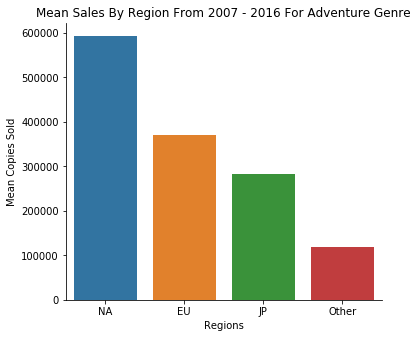

In [54]:
#Adventure T-Tests for Each Region compared to NA, as well as EU to JP showing that they are not significantly different
Adv_DF = data2[data2['Genre'] == 'Adventure']
Adv_DF_NA = data2[data2['Genre'] == 'Adventure']['NA_Sales']
Adv_DF_EU = data2[data2['Genre'] == 'Adventure']['EU_Sales']
Adv_DF_JP = data2[data2['Genre'] == 'Adventure']['JP_Sales']
Adv_DF_O = data2[data2['Genre'] == 'Adventure']['Other_Sales']


g = sns.catplot(x=['NA','EU','JP','Other'], y=[Adv_DF_NA.mean()*1000000, Adv_DF_EU.mean()*1000000,Adv_DF_JP.mean()*1000000,Adv_DF_O.mean()*1000000],data = data2,height=6,kind='bar', aspect = 1)
plt.xlabel('Regions')
plt.ylabel('Mean Copies Sold')
plt.title('Mean Sales By Region From 2007 - 2016 For Adventure Genre')


plt.show()

In [30]:
stats.ttest_ind(Adv_DF_NA,Adv_DF_EU)

Ttest_indResult(statistic=2.8853646271090363, pvalue=0.0039536545490003)

In [31]:
stats.ttest_ind(Adv_DF_NA,Adv_DF_JP)

Ttest_indResult(statistic=4.758994797344039, pvalue=2.09233213592818e-06)

In [32]:
stats.ttest_ind(Adv_DF_NA,Adv_DF_O)

Ttest_indResult(statistic=7.350702345396143, pvalue=2.9136555674284693e-13)

In [37]:
stats.ttest_ind(Adv_DF_EU,Adv_DF_JP)

Ttest_indResult(statistic=1.8437355574283478, pvalue=0.06537715330194667)

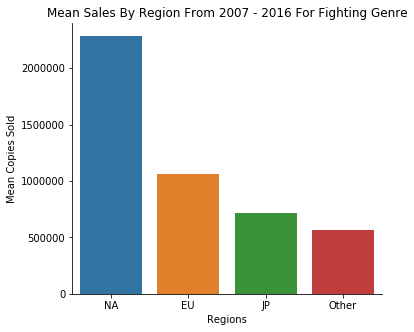

In [55]:
#Fighting T-Tests for Each Region compared to NA, as well as JP to EU and they are significantly different while JP and Others are not.
Fig_DF = data2[data2['Genre'] == 'Fighting']
Fig_DF_NA = data2[data2['Genre'] == 'Fighting']['NA_Sales']
Fig_DF_EU = data2[data2['Genre'] == 'Fighting']['EU_Sales']
Fig_DF_JP = data2[data2['Genre'] == 'Fighting']['JP_Sales']
Fig_DF_O = data2[data2['Genre'] == 'Fighting']['Other_Sales']


g = sns.catplot(x=['NA','EU','JP','Other'], y=[Fig_DF_NA.mean()*1000000, Fig_DF_EU.mean()*1000000,Fig_DF_JP.mean()*1000000,Fig_DF_O.mean()*1000000],data = data2,height=5.5,kind='bar', aspect = 1)
plt.xlabel('Regions')
plt.ylabel('Mean Copies Sold')
plt.title('Mean Sales By Region From 2007 - 2016 For Fighting Genre')
plt.show()

In [34]:
stats.ttest_ind(Fig_DF_NA,Fig_DF_EU)

Ttest_indResult(statistic=4.1586887805459485, pvalue=3.590161914834809e-05)

In [35]:
stats.ttest_ind(Fig_DF_NA,Fig_DF_JP)

Ttest_indResult(statistic=5.352443109472698, pvalue=1.170526110229023e-07)

In [36]:
stats.ttest_ind(Fig_DF_NA,Fig_DF_O)

Ttest_indResult(statistic=6.18234828587904, pvalue=1.062013277381189e-09)

In [38]:
stats.ttest_ind(Fig_DF_JP,Fig_DF_EU)

Ttest_indResult(statistic=-2.113899232992425, pvalue=0.034870033521197115)

In [39]:
stats.ttest_ind(Fig_DF_JP,Fig_DF_O)

Ttest_indResult(statistic=1.1625797441819992, pvalue=0.24538847959852203)

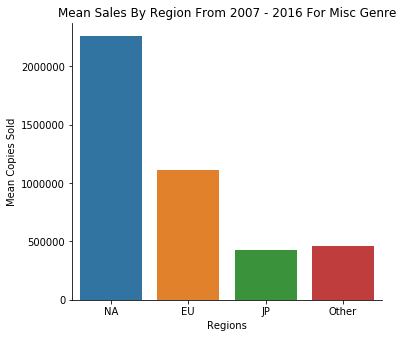

In [56]:
#Misc T-Tests for Each Region compared to NA, as well as Other and JP which are not sig diff
Mis_DF = data2[data2['Genre'] == 'Misc']
Mis_DF_NA = data2[data2['Genre'] == 'Misc']['NA_Sales']
Mis_DF_EU = data2[data2['Genre'] == 'Misc']['EU_Sales']
Mis_DF_JP = data2[data2['Genre'] == 'Misc']['JP_Sales']
Mis_DF_O = data2[data2['Genre'] == 'Misc']['Other_Sales']

g = sns.catplot(x=['NA','EU','JP','Other'], y=[Mis_DF_NA.mean()*1000000, Mis_DF_EU.mean()*1000000,Mis_DF_JP.mean()*1000000,Mis_DF_O.mean()*1000000],data = data2,height=5.5,kind='bar', aspect = 1)
plt.xlabel('Regions')
plt.ylabel('Mean Copies Sold')
plt.title('Mean Sales By Region From 2007 - 2016 For Misc Genre')
plt.show()

In [54]:
stats.ttest_ind(Mis_DF_NA,Mis_DF_EU)

Ttest_indResult(statistic=5.166796802602897, pvalue=2.587452788066473e-07)

In [55]:
stats.ttest_ind(Mis_DF_NA,Mis_DF_JP)

Ttest_indResult(statistic=8.91719263092954, pvalue=9.556588051264513e-19)

In [56]:
stats.ttest_ind(Mis_DF_NA,Mis_DF_O)

Ttest_indResult(statistic=8.94243546108952, pvalue=7.665607206172552e-19)

In [57]:
stats.ttest_ind(Mis_DF_JP,Mis_DF_O)

Ttest_indResult(statistic=-0.4555676837977493, pvalue=0.6487441158847058)

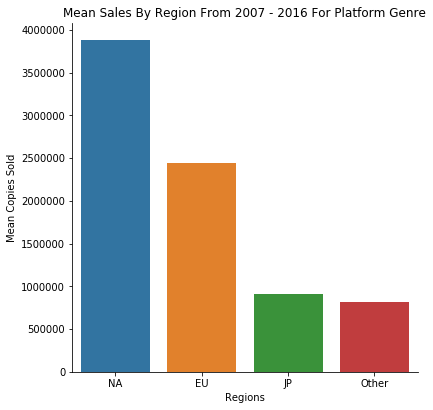

In [69]:
#Platform T-Tests for Each Region compared to NA, as well as Other and JP which are not sig diff
Plt_DF = data2[data2['Genre'] == 'Platform']
Plt_DF_NA = data2[data2['Genre'] == 'Platform']['NA_Sales']
Plt_DF_EU = data2[data2['Genre'] == 'Platform']['EU_Sales']
Plt_DF_JP = data2[data2['Genre'] == 'Platform']['JP_Sales']
Plt_DF_O = data2[data2['Genre'] == 'Platform']['Other_Sales']


g = sns.catplot(x=['NA','EU','JP','Other'], y=[Plt_DF_NA.mean()*1000000, Plt_DF_EU.mean()*1000000,Plt_DF_JP.mean()*1000000,Plt_DF_O.mean()*1000000],data = data2,height=6,kind='bar', aspect = 1)
plt.xlabel('Regions')
plt.ylabel('Mean Copies Sold')
plt.title('Mean Sales By Region From 2007 - 2016 For Platform Genre')
plt.savefig('plt_graph.png')

plt.show()

In [58]:
stats.ttest_ind(Plt_DF_NA,Plt_DF_EU)

Ttest_indResult(statistic=1.9909329245989047, pvalue=0.046965229987637705)

In [59]:
stats.ttest_ind(Plt_DF_NA,Plt_DF_JP)

Ttest_indResult(statistic=4.418225791784077, pvalue=1.1913303846990052e-05)

In [61]:
stats.ttest_ind(Plt_DF_NA,Plt_DF_O)

Ttest_indResult(statistic=4.758337394079629, pvalue=2.476985451041944e-06)

In [62]:
stats.ttest_ind(Plt_DF_JP,Plt_DF_O)

Ttest_indResult(statistic=0.34439566328150945, pvalue=0.7306757723233094)

In [22]:
plt_ttest= {'Test Groups': [ 'NA vs EU','NA vs JP','NA vs Other','JP vs Other' ], 'Statistic': [1.99,4.42,4.76,0.34], 'P-Value': [0.0470,1.19e-05,2.48e-06,0.731]}
plt_ttest_df = pd.DataFrame(data=plt_ttest)
plt_ttest_df.to_pickle('DF_plt_test')

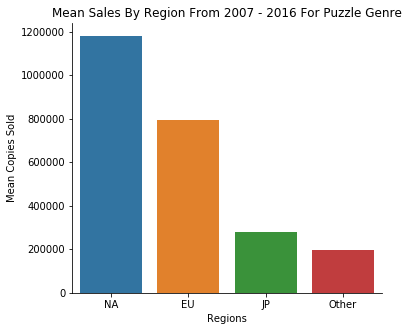

In [58]:
#Puzzle T-Tests for Each Region compared to NA, as well as JP and Other which are not sig diff.
Puz_DF = data2[data2['Genre'] == 'Puzzle']
Puz_DF_NA = data2[data2['Genre'] == 'Puzzle']['NA_Sales']
Puz_DF_EU = data2[data2['Genre'] == 'Puzzle']['EU_Sales']
Puz_DF_JP = data2[data2['Genre'] == 'Puzzle']['JP_Sales']
Puz_DF_O = data2[data2['Genre'] == 'Puzzle']['Other_Sales']


g = sns.catplot(x=['NA','EU','JP','Other'], y=[Puz_DF_NA.mean()*1000000, Puz_DF_EU.mean()*1000000,Puz_DF_JP.mean()*1000000,Puz_DF_O.mean()*1000000],data = data2,height=5.5,kind='bar', aspect = 1)
plt.xlabel('Regions')
plt.ylabel('Mean Copies Sold')
plt.title('Mean Sales By Region From 2007 - 2016 For Puzzle Genre')
plt.show()

In [64]:
stats.ttest_ind(Puz_DF_NA,Puz_DF_EU)

Ttest_indResult(statistic=2.0706336617104344, pvalue=0.038790936888396764)

In [65]:
stats.ttest_ind(Puz_DF_NA,Puz_DF_JP)

Ttest_indResult(statistic=6.427383266290824, pvalue=2.5274399417761704e-10)

In [66]:
stats.ttest_ind(Puz_DF_NA,Puz_DF_O)

Ttest_indResult(statistic=7.711714957716172, pvalue=4.730044933041536e-14)

In [40]:
stats.ttest_ind(Puz_DF_JP,Puz_DF_O)

Ttest_indResult(statistic=1.180473833679482, pvalue=0.23824763165566962)

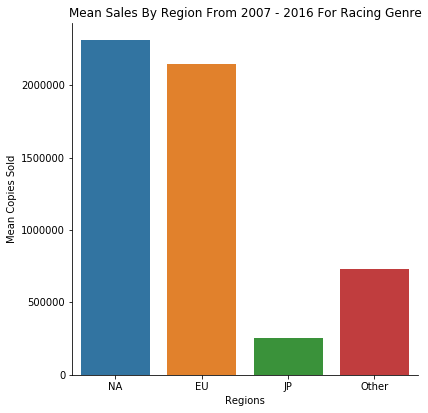

In [70]:
#Racing T-Tests for Each Region compared to NA, as well as JP and Other and they are sig diff. NA and EU are not sig diff.
Rac_DF = data2[data2['Genre'] == 'Racing']
Rac_DF_NA = data2[data2['Genre'] == 'Racing']['NA_Sales']
Rac_DF_EU = data2[data2['Genre'] == 'Racing']['EU_Sales']
Rac_DF_JP = data2[data2['Genre'] == 'Racing']['JP_Sales']
Rac_DF_O = data2[data2['Genre'] == 'Racing']['Other_Sales']

g = sns.catplot(x=['NA','EU','JP','Other'], y=[Rac_DF_NA.mean()*1000000, Rac_DF_EU.mean()*1000000,Rac_DF_JP.mean()*1000000,Rac_DF_O.mean()*1000000],data = data2,height=6,kind='bar', aspect = 1)
plt.xlabel('Regions')
plt.ylabel('Mean Copies Sold')
plt.title('Mean Sales By Region From 2007 - 2016 For Racing Genre')
plt.savefig('rac_graph.png')

plt.show()

In [68]:
stats.ttest_ind(Rac_DF_NA,Rac_DF_EU)

Ttest_indResult(statistic=0.3389106796739515, pvalue=0.7347502198160372)

In [69]:
stats.ttest_ind(Rac_DF_NA,Rac_DF_JP)

Ttest_indResult(statistic=5.391920907325774, pvalue=8.753252255489862e-08)

In [70]:
stats.ttest_ind(Rac_DF_NA,Rac_DF_O)

Ttest_indResult(statistic=4.149574428374609, pvalue=3.622738012745351e-05)

In [71]:
stats.ttest_ind(Rac_DF_JP,Rac_DF_O)

Ttest_indResult(statistic=-3.358765445545821, pvalue=0.0008133239148625627)

In [18]:
rac_ttest= {'Test Groups': [ 'NA vs EU','NA vs JP','NA vs Other','JP vs Other' ], 'Statistic': [0.34,5.39,4.15,-3.36], 'P-Value': [0.73,8.75e-08,3.62e-05,0.000813]}
rac_ttest_df = pd.DataFrame(data=rac_ttest)
rac_ttest_df.to_pickle('DF_rac_test')

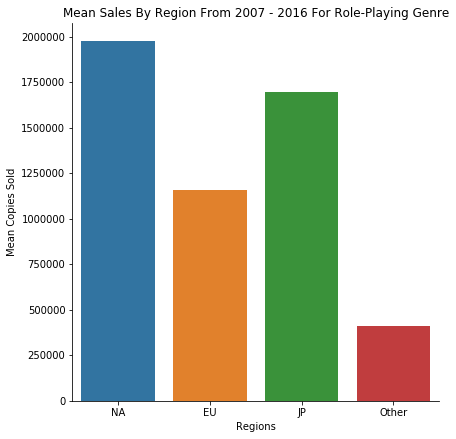

In [75]:
#Role-Playing T-Tests for Each Region compared to NA, as well as EU to JP which are sig diff. NA and JP are not sig diff
Rlp_DF = data2[data2['Genre'] == 'Role-Playing']
Rlp_DF_NA = data2[data2['Genre'] == 'Role-Playing']['NA_Sales']
Rlp_DF_EU = data2[data2['Genre'] == 'Role-Playing']['EU_Sales']
Rlp_DF_JP = data2[data2['Genre'] == 'Role-Playing']['JP_Sales']
Rlp_DF_O = data2[data2['Genre'] == 'Role-Playing']['Other_Sales']


g = sns.catplot(x=['NA','EU','JP','Other'], y=[Rlp_DF_NA.mean()*1000000, Rlp_DF_EU.mean()*1000000,Rlp_DF_JP.mean()*1000000,Rlp_DF_O.mean()*1000000],data = data2,height=6.3,kind='bar', aspect = 1)
plt.xlabel('Regions')
plt.ylabel('Mean Copies Sold')
plt.title('Mean Sales By Region From 2007 - 2016 For Role-Playing Genre')
plt.savefig('rlp_graph.png')

plt.show()

In [73]:
stats.ttest_ind(Rlp_DF_NA,Rlp_DF_EU)

Ttest_indResult(statistic=3.827820856225093, pvalue=0.00013376897394902889)

In [74]:
stats.ttest_ind(Rlp_DF_NA,Rlp_DF_JP)

Ttest_indResult(statistic=1.1606668561366644, pvalue=0.24593356890148563)

In [75]:
stats.ttest_ind(Rlp_DF_NA,Rlp_DF_O)

Ttest_indResult(statistic=8.617540570189885, pvalue=1.4871126202707036e-17)

In [76]:
stats.ttest_ind(Rlp_DF_EU,Rlp_DF_JP)

Ttest_indResult(statistic=-2.6792968967930477, pvalue=0.007445880033736159)

In [19]:
rlp_ttest= {'Test Groups': [ 'NA vs EU','NA vs JP','NA vs Other','EU vs JP' ], 'Statistic': [3.83,1.16,8.62,-2.68], 'P-Value': [0.000134,0.25,1.49e-17,0.00745]}
rlp_ttest_df = pd.DataFrame(data=rlp_ttest)
rlp_ttest_df.to_pickle('DF_rlp_test')

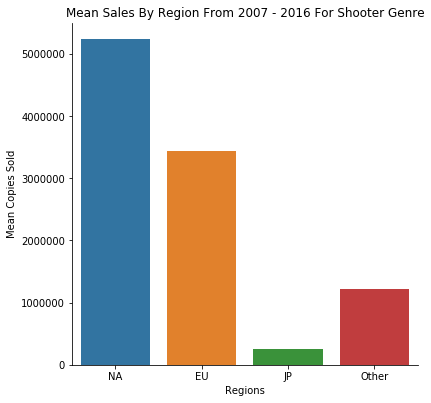

In [72]:
#Shooter T-Tests for Each Region compared to NA
Sho_DF = data2[data2['Genre'] == 'Shooter']
Sho_DF_NA = data2[data2['Genre'] == 'Shooter']['NA_Sales']
Sho_DF_EU = data2[data2['Genre'] == 'Shooter']['EU_Sales']
Sho_DF_JP = data2[data2['Genre'] == 'Shooter']['JP_Sales']
Sho_DF_O = data2[data2['Genre'] == 'Shooter']['Other_Sales']


g = sns.catplot(x=['NA','EU','JP','Other'], y=[Sho_DF_NA.mean()*1000000, Sho_DF_EU.mean()*1000000,Sho_DF_JP.mean()*1000000,Sho_DF_O.mean()*1000000],data = data2,height=6,kind='bar', aspect = 1)
plt.xlabel('Regions')
plt.ylabel('Mean Copies Sold')
plt.title('Mean Sales By Region From 2007 - 2016 For Shooter Genre')
plt.savefig('sho_graph.png')

plt.show()

In [78]:
stats.ttest_ind(Sho_DF_NA,Sho_DF_EU)

Ttest_indResult(statistic=3.387366620860105, pvalue=0.0007262219162097366)

In [79]:
stats.ttest_ind(Sho_DF_NA,Sho_DF_JP)

Ttest_indResult(statistic=10.926689269878745, pvalue=1.1167370672705472e-26)

In [80]:
stats.ttest_ind(Sho_DF_NA,Sho_DF_O)

Ttest_indResult(statistic=8.655578754325902, pvalue=1.389218588623996e-17)

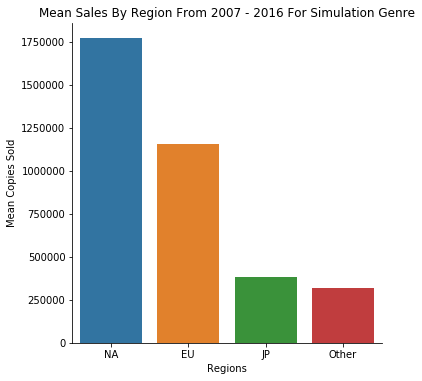

In [62]:
#Simulation T-Tests for Each Region compared to NA, as well as JP and Other which are not sig diff
Sim_DF = data2[data2['Genre'] == 'Simulation']
Sim_DF_NA = data2[data2['Genre'] == 'Simulation']['NA_Sales']
Sim_DF_EU = data2[data2['Genre'] == 'Simulation']['EU_Sales']
Sim_DF_JP = data2[data2['Genre'] == 'Simulation']['JP_Sales']
Sim_DF_O = data2[data2['Genre'] == 'Simulation']['Other_Sales']


g = sns.catplot(x=['NA','EU','JP','Other'], y=[Sim_DF_NA.mean()*1000000, Sim_DF_EU.mean()*1000000,Sim_DF_JP.mean()*1000000,Sim_DF_O.mean()*1000000],data = data2,height=5.5,kind='bar', aspect = 1)
plt.xlabel('Regions')
plt.ylabel('Mean Copies Sold')
plt.title('Mean Sales By Region From 2007 - 2016 For Simulation Genre')
plt.show()

In [85]:
stats.ttest_ind(Sim_DF_NA,Sim_DF_EU)

Ttest_indResult(statistic=3.08371031762511, pvalue=0.00209541315476745)

In [86]:
stats.ttest_ind(Sim_DF_NA,Sim_DF_JP)

Ttest_indResult(statistic=9.119484462684982, pvalue=3.506248159288101e-19)

In [87]:
stats.ttest_ind(Sim_DF_NA,Sim_DF_O)

Ttest_indResult(statistic=12.15845313084975, pvalue=5.31745875207544e-32)

In [47]:
stats.ttest_ind(Sim_DF_JP,Sim_DF_O)

Ttest_indResult(statistic=0.625224559673178, pvalue=0.5319535996296346)

In [20]:
sho_ttest= {'Test Groups': [ 'NA vs EU','NA vs JP','NA vs Other','JP vs Other' ], 'Statistic': [3.08,9.12,12.16,0.63], 'P-Value': [0.0021,3.51e-19,5.32e-32,0.532]}
sho_ttest_df = pd.DataFrame(data=sho_ttest)
sho_ttest_df.to_pickle('DF_sho_test')

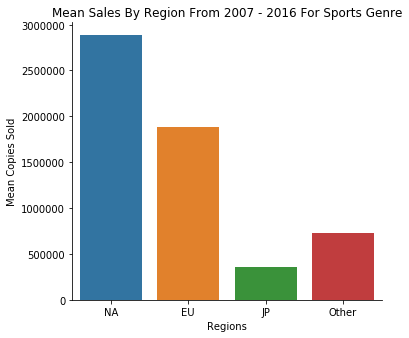

In [63]:
#Sports T-Tests for Each Region compared to NA, as well as JP and Other which are sig diff.
Spt_DF = data2[data2['Genre'] == 'Sports']
Spt_DF_NA = data2[data2['Genre'] == 'Sports']['NA_Sales']
Spt_DF_EU = data2[data2['Genre'] == 'Sports']['EU_Sales']
Spt_DF_JP = data2[data2['Genre'] == 'Sports']['JP_Sales']
Spt_DF_O = data2[data2['Genre'] == 'Sports']['Other_Sales']


g = sns.catplot(x=['NA','EU','JP','Other'], y=[Spt_DF_NA.mean()*1000000, Spt_DF_EU.mean()*1000000,Spt_DF_JP.mean()*1000000,Spt_DF_O.mean()*1000000],data = data2,height=5.5,kind='bar', aspect = 1)
plt.xlabel('Regions')
plt.ylabel('Mean Copies Sold')
plt.title('Mean Sales By Region From 2007 - 2016 For Sports Genre')
plt.show()

In [89]:
stats.ttest_ind(Spt_DF_NA,Spt_DF_EU)

Ttest_indResult(statistic=3.3664731430955595, pvalue=0.0007741827137367315)

In [90]:
stats.ttest_ind(Spt_DF_NA,Spt_DF_JP)

Ttest_indResult(statistic=11.239696531584098, pvalue=1.4825305993168848e-28)

In [91]:
stats.ttest_ind(Spt_DF_NA,Spt_DF_O)

Ttest_indResult(statistic=9.418427117342942, pvalue=1.095959265149854e-20)

In [51]:
stats.ttest_ind(Spt_DF_JP,Spt_DF_O)

Ttest_indResult(statistic=-4.378917967178292, pvalue=1.2474316443297585e-05)

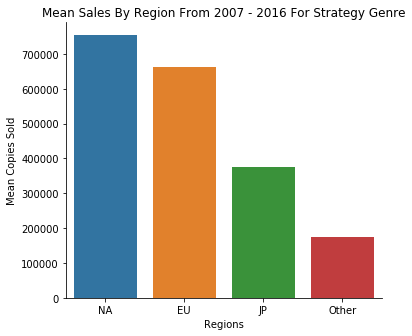

In [64]:
#Strategy T-Tests for Each Region compared to NA, as well as EU to JP and JP to Other which are both sig diff.
Str_DF = data2[data2['Genre'] == 'Strategy']
Str_DF_NA = data2[data2['Genre'] == 'Strategy']['NA_Sales']
Str_DF_EU = data2[data2['Genre'] == 'Strategy']['EU_Sales']
Str_DF_JP = data2[data2['Genre'] == 'Strategy']['JP_Sales']
Str_DF_O = data2[data2['Genre'] == 'Strategy']['Other_Sales']


g = sns.catplot(x=['NA','EU','JP','Other'], y=[Str_DF_NA.mean()*1000000, Str_DF_EU.mean()*1000000,Str_DF_JP.mean()*1000000,Str_DF_O.mean()*1000000],data = data2,height=5.5,kind='bar', aspect = 1)
plt.xlabel('Regions')
plt.ylabel('Mean Copies Sold')
plt.title('Mean Sales By Region From 2007 - 2016 For Strategy Genre')
plt.show()

In [95]:
stats.ttest_ind(Str_DF_NA,Str_DF_EU)

Ttest_indResult(statistic=0.6319963394457283, pvalue=0.527595618074697)

In [96]:
stats.ttest_ind(Str_DF_NA,Str_DF_JP)

Ttest_indResult(statistic=3.16825765970758, pvalue=0.0016002507845273351)

In [97]:
stats.ttest_ind(Str_DF_NA,Str_DF_O)

Ttest_indResult(statistic=5.123094058682829, pvalue=3.890956962246794e-07)

In [98]:
stats.ttest_ind(Str_DF_EU,Str_DF_JP)

Ttest_indResult(statistic=2.8916003241384214, pvalue=0.003951692503493819)

In [53]:
stats.ttest_ind(Str_DF_O,Str_DF_JP)

Ttest_indResult(statistic=-4.122064617441178, pvalue=4.205062343858038e-05)

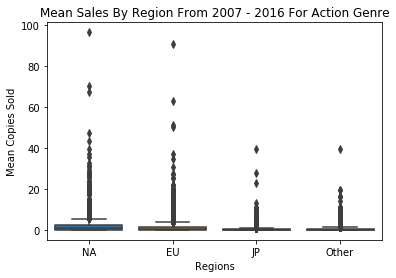

In [24]:
Act_DF = data2[data2['Genre'] == 'Action']
Act_DF_NA = data2[data2['Genre'] == 'Action']['NA_Sales']
Act_DF_EU = data2[data2['Genre'] == 'Action']['EU_Sales']
Act_DF_JP = data2[data2['Genre'] == 'Action']['JP_Sales']
Act_DF_O = data2[data2['Genre'] == 'Action']['Other_Sales']

g = sns.boxplot(x=['NA','EU','JP','Other'], y=[Act_DF_NA, Act_DF_EU,Act_DF_JP,Act_DF_O],data = data2)
plt.xlabel('Regions')
#plt.ylabel('Mean Copies Sold')
#plt.title('Mean Sales By Region From 2007 - 2016 For Action Genre')
plt.savefig('act_graph.png')

plt.show()

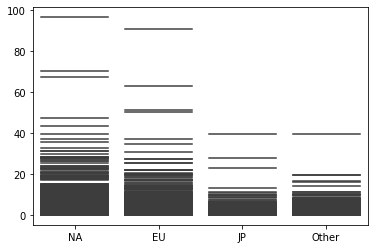

In [25]:
g = sns.violinplot(x=['NA','EU','JP','Other'], y=[Act_DF_NA, Act_DF_EU,Act_DF_JP,Act_DF_O],data = data2)
plt.show()

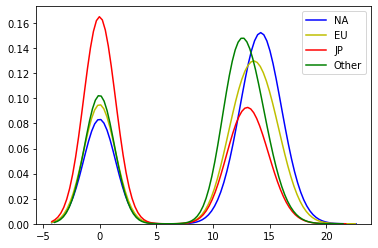

In [38]:
#Action T-Tests for Each Region compared to NA, as well as JP compared to Other showing that they are significantly different
Act_DF = data2[data2['Genre'] == 'Action']
Act_DF_NA = np.log(data2[data2['Genre'] == 'Action']['NA_Sales']*1000000 + 1)
Act_DF_EU = np.log(data2[data2['Genre'] == 'Action']['EU_Sales']*1000000 +1)
Act_DF_JP = np.log(data2[data2['Genre'] == 'Action']['JP_Sales']*1000000 +1)
Act_DF_O = np.log(data2[data2['Genre'] == 'Action']['Other_Sales']*1000000 +1)

sns.kdeplot(list(Act_DF_NA), color = 'b', label = 'NA')
sns.kdeplot(list(Act_DF_EU), color = 'y', label = 'EU')
sns.kdeplot(list(Act_DF_JP), color = 'r', label = 'JP')
sns.kdeplot(list(Act_DF_O), color = 'g', label = 'Other')

#plt.xlabel('Regions')
#plt.ylabel('Mean Copies Sold')
#plt.title('Mean Sales By Region From 2007 - 2016 For Action Genre')
#plt.savefig('act_graph.png')
plt.legend()
plt.show()

#helpful_log = np.log(df.Helpful_Votes + 1)


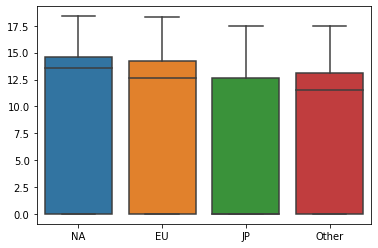

In [14]:
#Action T-Tests for Each Region compared to NA, as well as JP compared to Other showing that they are significantly different
Act_DF = data2[data2['Genre'] == 'Action']
Act_DF_NA = np.log(data2[data2['Genre'] == 'Action']['NA_Sales']*1000000 + 1)
Act_DF_EU = np.log(data2[data2['Genre'] == 'Action']['EU_Sales']*1000000 +1)
Act_DF_JP = np.log(data2[data2['Genre'] == 'Action']['JP_Sales']*1000000 +1)
Act_DF_O = np.log(data2[data2['Genre'] == 'Action']['Other_Sales']*1000000 +1)

sns.boxplot(x=['NA','EU','JP','Other'], y=[Act_DF_NA, Act_DF_EU,Act_DF_JP,Act_DF_O])
#plt.xlabel('Regions')
#plt.ylabel('Mean Copies Sold')
#plt.title('Mean Sales By Region From 2007 - 2016 For Action Genre')
#plt.savefig('act_graph.png')

plt.show()

#helpful_log = np.log(df.Helpful_Votes + 1)


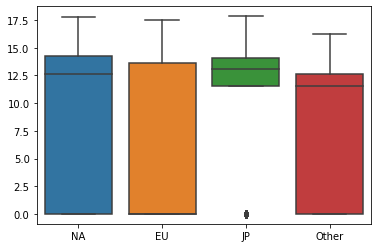

In [17]:
#Action T-Tests for Each Region compared to NA, as well as JP compared to Other showing that they are significantly different
Rlp_DF = data2[data2['Genre'] == 'Role-Playing']
Rlp_DF_NA = np.log(data2[data2['Genre'] == 'Role-Playing']['NA_Sales']*1000000 + 1)
Rlp_DF_EU = np.log(data2[data2['Genre'] == 'Role-Playing']['EU_Sales']*1000000 +1)
Rlp_DF_JP = np.log(data2[data2['Genre'] == 'Role-Playing']['JP_Sales']*1000000 +1)
Rlp_DF_O = np.log(data2[data2['Genre'] == 'Role-Playing']['Other_Sales']*1000000 +1)

sns.boxplot(x=['NA','EU','JP','Other'], y=[Rlp_DF_NA, Rlp_DF_EU,Rlp_DF_JP,Rlp_DF_O])
#plt.xlabel('Regions')
#plt.ylabel('Mean Copies Sold')
#plt.title('Mean Sales By Region From 2007 - 2016 For Action Genre')
#plt.savefig('act_graph.png')

plt.show()

#helpful_log = np.log(df.Helpful_Votes + 1)


In [22]:
Act_DF_NA.head()

16    18.066859
23    18.386089
42    17.494340
46    17.585970
51    18.029119
Name: NA_Sales, dtype: float64

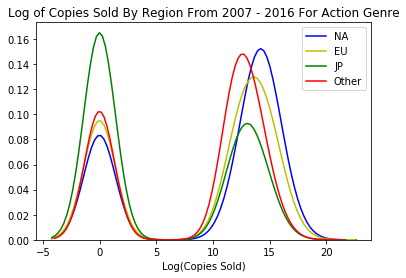

In [4]:
#Action T-Tests for Each Region compared to NA, as well as JP compared to Other showing that they are significantly different
Act_DF = data2[data2['Genre'] == 'Action']
Act_DF_NA = np.log(data2[data2['Genre'] == 'Action']['NA_Sales']*1000000 + 1)
Act_DF_EU = np.log(data2[data2['Genre'] == 'Action']['EU_Sales']*1000000 +1)
Act_DF_JP = np.log(data2[data2['Genre'] == 'Action']['JP_Sales']*1000000 +1)
Act_DF_O = np.log(data2[data2['Genre'] == 'Action']['Other_Sales']*1000000 +1)

sns.kdeplot(list(Act_DF_NA), color = 'b', label = 'NA')
sns.kdeplot(list(Act_DF_EU), color = 'y', label = 'EU')
sns.kdeplot(list(Act_DF_JP), color = 'g', label = 'JP')
sns.kdeplot(list(Act_DF_O), color = 'r', label = 'Other')

plt.xlabel('Log(Copies Sold)')
#plt.ylabel('Mean Copies Sold')
plt.title('Log of Copies Sold By Region From 2007 - 2016 For Action Genre')
plt.savefig('act_graph2.png')
plt.legend()
plt.show()

#helpful_log = np.log(df.Helpful_Votes + 1)

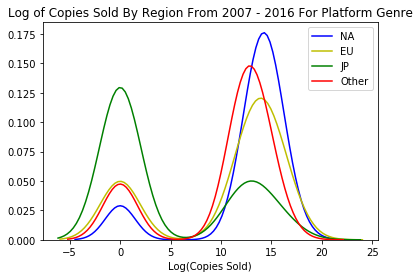

In [5]:
#Action T-Tests for Each Region compared to NA, as well as JP compared to Other showing that they are significantly different
Plt_DF = data2[data2['Genre'] == 'Platform']
Plt_DF_NA = np.log(data2[data2['Genre'] == 'Platform']['NA_Sales']*1000000 + 1)
Plt_DF_EU = np.log(data2[data2['Genre'] == 'Platform']['EU_Sales']*1000000 +1)
Plt_DF_JP = np.log(data2[data2['Genre'] == 'Platform']['JP_Sales']*1000000 +1)
Plt_DF_O = np.log(data2[data2['Genre'] == 'Platform']['Other_Sales']*1000000 +1)

sns.kdeplot(list(Plt_DF_NA), color = 'b', label = 'NA')
sns.kdeplot(list(Plt_DF_EU), color = 'y', label = 'EU')
sns.kdeplot(list(Plt_DF_JP), color = 'g', label = 'JP')
sns.kdeplot(list(Plt_DF_O), color = 'r', label = 'Other')

plt.xlabel('Log(Copies Sold)')
#plt.ylabel('Mean Copies Sold')
plt.title('Log of Copies Sold By Region From 2007 - 2016 For Platform Genre')
plt.savefig('plt_graph2.png')
plt.legend()
plt.show()

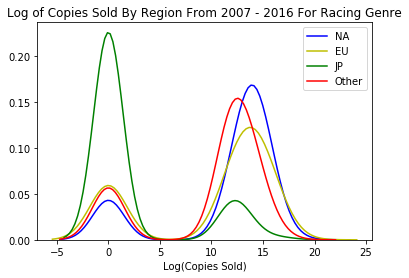

In [6]:
Rac_DF = data2[data2['Genre'] == 'Racing']
Rac_DF_NA = np.log(data2[data2['Genre'] == 'Racing']['NA_Sales']*1000000 + 1)
Rac_DF_EU = np.log(data2[data2['Genre'] == 'Racing']['EU_Sales']*1000000 +1)
Rac_DF_JP = np.log(data2[data2['Genre'] == 'Racing']['JP_Sales']*1000000 +1)
Rac_DF_O = np.log(data2[data2['Genre'] == 'Racing']['Other_Sales']*1000000 +1)

sns.kdeplot(list(Rac_DF_NA), color = 'b', label = 'NA')
sns.kdeplot(list(Rac_DF_EU), color = 'y', label = 'EU')
sns.kdeplot(list(Rac_DF_JP), color = 'g', label = 'JP')
sns.kdeplot(list(Rac_DF_O), color = 'r', label = 'Other')

plt.xlabel('Log(Copies Sold)')
#plt.ylabel('Mean Copies Sold')
plt.title('Log of Copies Sold By Region From 2007 - 2016 For Racing Genre')
plt.savefig('rac_graph2.png')
plt.legend()
plt.show()

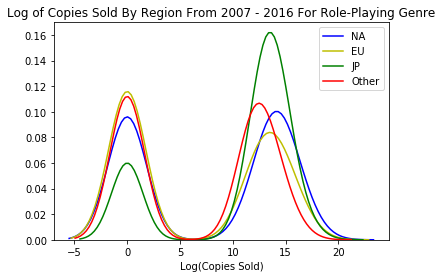

In [7]:
Rlp_DF = data2[data2['Genre'] == 'Role-Playing']
Rlp_DF_NA = np.log(data2[data2['Genre'] == 'Role-Playing']['NA_Sales']*1000000 + 1)
Rlp_DF_EU = np.log(data2[data2['Genre'] == 'Role-Playing']['EU_Sales']*1000000 +1)
Rlp_DF_JP = np.log(data2[data2['Genre'] == 'Role-Playing']['JP_Sales']*1000000 +1)
Rlp_DF_O = np.log(data2[data2['Genre'] == 'Role-Playing']['Other_Sales']*1000000 +1)

sns.kdeplot(list(Rlp_DF_NA), color = 'b', label = 'NA')
sns.kdeplot(list(Rlp_DF_EU), color = 'y', label = 'EU')
sns.kdeplot(list(Rlp_DF_JP), color = 'g', label = 'JP')
sns.kdeplot(list(Rlp_DF_O), color = 'r', label = 'Other')

plt.xlabel('Log(Copies Sold)')
#plt.ylabel('Mean Copies Sold')
plt.title('Log of Copies Sold By Region From 2007 - 2016 For Role-Playing Genre')
plt.savefig('rlp_graph2.png')
plt.legend()
plt.show()

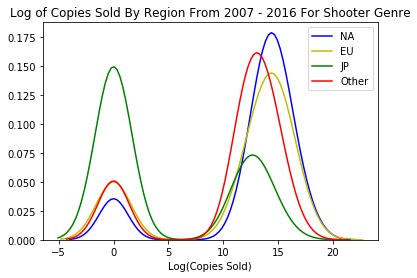

In [8]:
Sho_DF = data2[data2['Genre'] == 'Shooter']
Sho_DF_NA = np.log(data2[data2['Genre'] == 'Shooter']['NA_Sales']*1000000 + 1)
Sho_DF_EU = np.log(data2[data2['Genre'] == 'Shooter']['EU_Sales']*1000000 +1)
Sho_DF_JP = np.log(data2[data2['Genre'] == 'Shooter']['JP_Sales']*1000000 +1)
Sho_DF_O = np.log(data2[data2['Genre'] == 'Shooter']['Other_Sales']*1000000 +1)

sns.kdeplot(list(Sho_DF_NA), color = 'b', label = 'NA')
sns.kdeplot(list(Sho_DF_EU), color = 'y', label = 'EU')
sns.kdeplot(list(Sho_DF_JP), color = 'g', label = 'JP')
sns.kdeplot(list(Sho_DF_O), color = 'r', label = 'Other')

plt.xlabel('Log(Copies Sold)')
#plt.ylabel('Mean Copies Sold')
plt.title('Log of Copies Sold By Region From 2007 - 2016 For Shooter Genre')
plt.savefig('sho_graph2.png')
plt.legend()
plt.show()

In [76]:
Sho_DF_NA

29       90.4
31       60.3
32       97.0
34       49.9
35       82.5
36       85.2
37       55.4
41       59.9
44       79.7
55       49.9
60       67.3
64       70.4
66       66.5
69       41.0
70       59.3
87       29.9
92       28.1
99       45.9
100      48.1
101      44.6
104      28.5
117      41.5
120      31.1
134      43.4
140      40.5
154      24.9
170      27.3
171      18.5
179      32.2
209      30.5
         ... 
15684     0.0
15698     0.0
15704     0.2
15705     0.0
15791     0.0
15799     0.2
15826     0.1
15835     0.0
15843     0.2
15883     0.2
15939     0.1
15948     0.0
15966     0.0
15999     0.0
16008     0.1
16137     0.0
16219     0.0
16290     0.0
16304     0.0
16322     0.0
16347     0.1
16371     0.0
16400     0.1
16410     0.0
16415     0.0
16541     0.0
16544     0.0
16580     0.0
16606     0.1
16700     0.1
Name: NA_Sales, Length: 668, dtype: float64